In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import trimesh

In [2]:
df_denhaag_ahn3 = pd.read_parquet(r"D:\thesis\progress\2.27\denhaag_ahn3.parquet")
df_denhaag_ahn4 = pd.read_parquet(r"D:\thesis\progress\2.27\denhaag_ahn4.parquet")
df_rotterdam_ahn3 = pd.read_parquet(r"D:\thesis\progress\2.27\rotterdam_ahn3.parquet")
df_rotterdam_ahn4 = pd.read_parquet(r"D:\thesis\progress\2.27\rotterdam_ahn4.parquet")
df_denhaag_added_ahn3 = pd.read_parquet(r"D:\thesis\progress\2.27\denhaag_added_ahn3.parquet")
df_denhaag_added_ahn4 = pd.read_parquet(r"D:\thesis\progress\2.27\denhaag_added_ahn4.parquet")
df_rotterdam_added_ahn3 = pd.read_parquet(r"D:\thesis\progress\2.27\rotterdam_added_ahn3.parquet")
df_rotterdam_added_ahn4 = pd.read_parquet(r"D:\thesis\progress\2.27\rotterdam_added_ahn4.parquet")


df_denhaag_ahn3["city"] = "DenHaag"
df_denhaag_ahn4["city"] = "DenHaag"
df_denhaag_added_ahn3["city"] = "DenHaag"  # added data is the data that was not in the original dataset
df_denhaag_added_ahn4["city"] = "DenHaag"
df_rotterdam_ahn3["city"] = "Rotterdam"
df_rotterdam_ahn4["city"] = "Rotterdam"
df_rotterdam_added_ahn3["city"] = "Rotterdam"
df_rotterdam_added_ahn4["city"] = "Rotterdam"
df_denhaag_ahn3["data source"] = "ahn3"
df_denhaag_ahn4["data source"] = "ahn4"
df_denhaag_added_ahn3["data source"] = "ahn3"
df_denhaag_added_ahn4["data source"] = "ahn4"
df_rotterdam_ahn3["data source"] = "ahn3"
df_rotterdam_ahn4["data source"] = "ahn4"
df_rotterdam_added_ahn3["data source"] = "ahn3"
df_rotterdam_added_ahn4["data source"] = "ahn4"

In [3]:
#df_all = pd.concat([df_denhaag_ahn3, df_denhaag_ahn4, df_rotterdam_ahn3, df_rotterdam_ahn4]).reset_index(drop=True)
df_all = pd.concat([df_denhaag_ahn3, df_denhaag_ahn4, df_rotterdam_ahn3, df_rotterdam_ahn4, df_denhaag_added_ahn3, df_denhaag_added_ahn4, df_rotterdam_added_ahn3, df_rotterdam_added_ahn4]).reset_index(drop=True)
df_all.to_csv(r"D:\thesis\progress\2.11\all.csv")
print(df_all["sparsity_rate"].describe)


<bound method NDFrame.describe of 0         0.485149
1         0.227848
2         0.326180
3         0.084314
4         0.141075
            ...   
677253    0.360787
677254    0.375098
677255    0.364274
677256    0.391754
677257    0.386894
Name: sparsity_rate, Length: 677258, dtype: float64>


In [4]:
print(len(df_all))
print(len(df_all[df_all["sparsity_rate"]>0.25]))
df_sparse = df_all[df_all["sparsity_rate"]>0.22]    
print(df_sparse['footprint_area'].describe())
print(len(df_sparse[(df_sparse["normalized_hausdorff_distance"]>0.06) & (df_sparse['footprint_area']>50)]))


677258
343753
count    404557.000000
mean        107.870683
std         569.746318
min           0.390687
25%           9.922856
50%          51.620372
75%          80.783785
max       80280.942411
Name: footprint_area, dtype: float64
18727


In [5]:
print(len(df_all))
print(len(df_all[df_all["sparsity_rate"]>0.4]))
df_sparsity = df_all[df_all["sparsity_rate"]>0.4]
# print(df_sparsity.head())   
print(len(df_all[df_all["sparsity_rate"]>0.4]),"sparsity rate > 0.4")
print(len(df_all[df_all["sparsity_rate"]>0.3]),"sparsity rate > 0.3")
print(len(df_all[(df_all["sparsity_rate"]>0.11) & (df_all["chamfer_distance"]>0.0002)&(df_all["footprint_area"]>68)&(df_all["hausdorff_distance"]>0.023)] ),"sparsity rate > 0.2")
print(df_all["sparsity_rate"].describe())
print(df_all.head(1))
print(df_all["max_range"].describe())

677258
70876
70876 sparsity rate > 0.4
234787 sparsity rate > 0.3
186823 sparsity rate > 0.2
count    677258.000000
mean          0.251570
std           0.129849
min           0.000000
25%           0.152778
50%           0.252747
75%           0.331818
max           1.000000
Name: sparsity_rate, dtype: float64
               filename  mesh_faces  footprint_area  slope_ratio  \
0  bag_0518100000100042          16        6.496368          0.0   

   slope_face_number  sparsity_rate  chamfer_distance  hausdorff_distance  \
0                  0       0.485149          0.702035            3.162278   

   max_range    max_z  normalized_chamfer_distance  \
0    4.03125  2.35705                     0.046802   

   normalized_hausdorff_distance     city data source  
0                       0.210819  DenHaag        ahn3  
count    677258.000000
mean         12.222956
std          12.122017
min           0.953125
25%           5.062500
50%          11.000000
75%          14.335938
max         5

29229


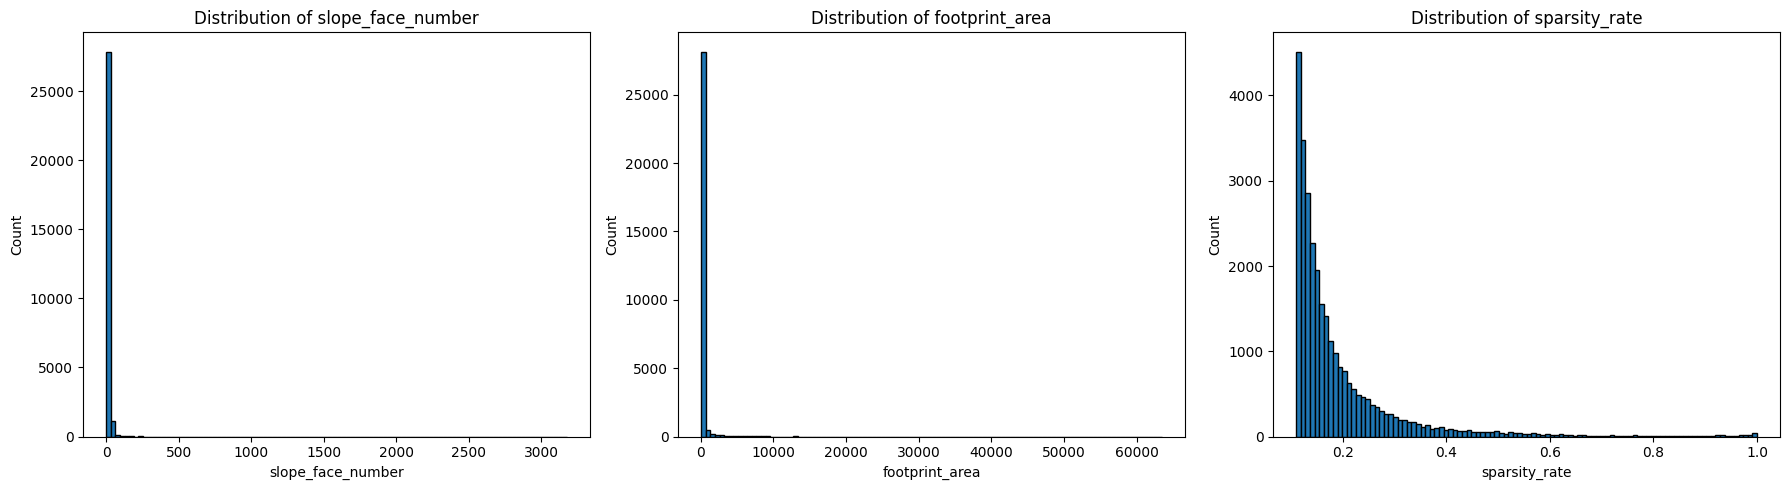

In [5]:
df_3w = df_all[(df_all["sparsity_rate"]>0.11) & (df_all["chamfer_distance"]>0.0002)&(df_all["footprint_area"]>68)&(df_all["hausdorff_distance"]>0.023)]
print(len(df_3w))
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(18, 5))

# 列名列表
columns_to_plot = ["slope_face_number", "footprint_area", "sparsity_rate"]

# 分箱的数量
num_bins = 100

# 遍历每个列，分别绘制图
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(1, 3, i)  # 创建3行1列的子图
    
    # 对列数据进行分箱
    bins = np.linspace(df_3w[col].min(), df_3w[col].max(), num_bins + 1)  # 生成分箱区间
    binned_counts = np.histogram(df_3w[col], bins=bins)  # 统计每个区间的数量
    
    # 绘制条形图
    bin_centers = (bins[:-1] + bins[1:]) / 2  # 计算区间中心点作为横坐标
    plt.bar(bin_centers, binned_counts[0], width=np.diff(bins), edgecolor='black', align='center')
    
    # 设置图表标题和轴标签
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

# 显示图形
plt.show()


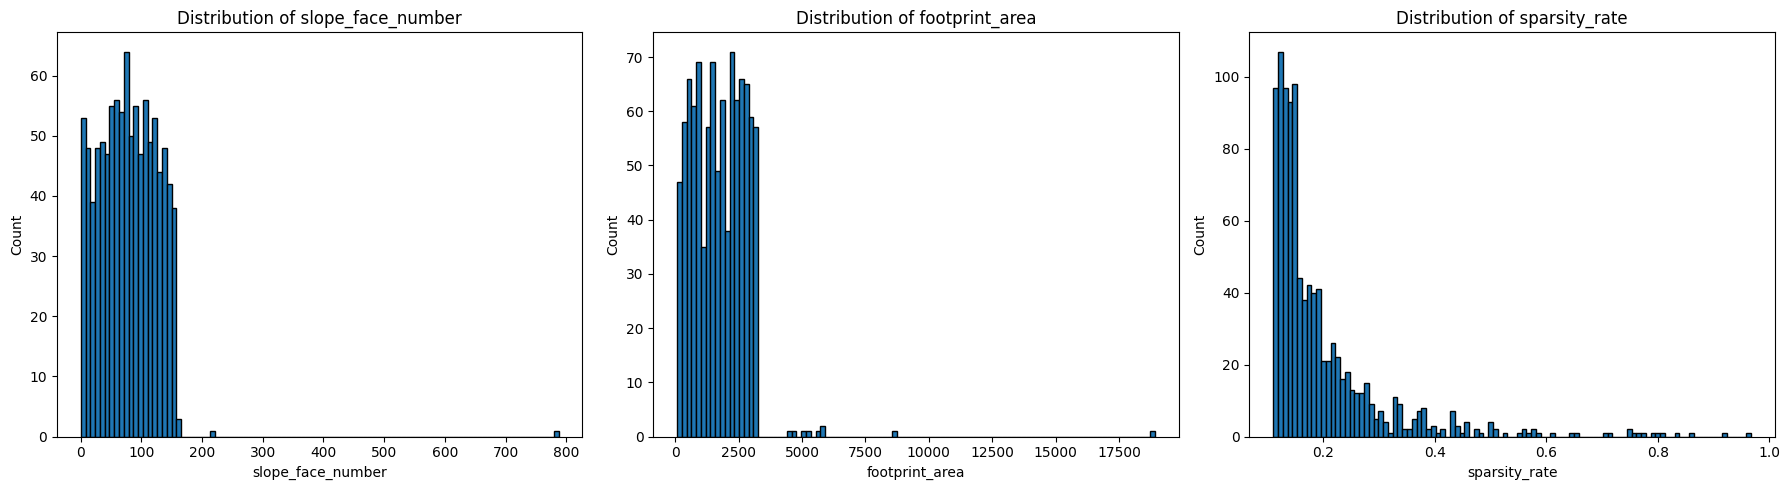

In [64]:
import pandas as pd
import numpy as np

# 定义目标列
columns_to_sample = ["slope_face_number", "footprint_area", "sparsity_rate"]

# 创建一个空 DataFrame 保存采样结果
sampled_subset = pd.DataFrame()

# 分箱数
num_bins = 20
sample_size = 1000  # 总采样数

# 每列单独采样
for col in columns_to_sample:
    # 统计分箱的频率
    counts, bin_edges = np.histogram(df_3w[col], bins=num_bins)
    probabilities = counts / counts.sum()  # 计算每个区间的概率
    
    # 随机采样区间
    sampled_bins = np.random.choice(len(probabilities), size=sample_size, p=probabilities)
    
    # 在每个区间内随机采样
    sampled_values = []
    for bin_idx in sampled_bins:
        bin_min, bin_max = bin_edges[bin_idx], bin_edges[bin_idx + 1]
        sampled_values.append(np.random.uniform(bin_min, bin_max))
    
    sampled_subset[col] = sampled_values



# 设置图形大小
plt.figure(figsize=(18, 5))

# 列名列表
columns_to_plot = ["slope_face_number", "footprint_area", "sparsity_rate"]

# 分箱的数量
num_bins = 100

# 遍历每个列，分别绘制图
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(1, 3, i)  # 创建3行1列的子图
    
    # 对列数据进行分箱
    bins = np.linspace(sampled_subset[col].min(), sampled_subset[col].max(), num_bins + 1)  # 生成分箱区间
    binned_counts = np.histogram(sampled_subset[col], bins=bins)  # 统计每个区间的数量
    
    # 绘制条形图
    bin_centers = (bins[:-1] + bins[1:]) / 2  # 计算区间中心点作为横坐标
    plt.bar(bin_centers, binned_counts[0], width=np.diff(bins), edgecolor='black', align='center')
    
    # 设置图表标题和轴标签
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

# 显示图形
plt.show()



In [7]:
# print(df_all["chamfer_distance"].describe())
# print(df_all["hausdorff_distance"].describe())
print(df_all[df_all["filename"]=="BAG_0599100000701897"])

# print(df_all["footprint_area"].describe())
# print(len(df_all[(df_all["slope_face_number"]>1)&(df_all["footprint_area"]>20)&(df_all["hausdorff_distance"]>0.15)]))
# # print(len(df_all[df_all["hausdorff_distance"]>0.15]))
# df_chamfer = df_all[(df_all["chamfer_distance"]>0.03)&(df_all["footprint_area"]>20)&(df_all["slope_face_number"]>1)]
# df_hausdorff = df_all[df_all["hausdorff_distance"]>0.15]
# print(len(df_chamfer))


                    filename  mesh_faces  footprint_area  slope_ratio  \
640828  BAG_0599100000701897        7236         7664.64     0.244528   
658089  BAG_0599100000701897        7236         7664.64     0.244528   

        slope_face_number  sparsity_rate  chamfer_distance  \
640828               3179       0.110680          0.000521   
658089               3179       0.161552          0.000749   

        hausdorff_distance       city data source  
640828            0.023949  Rotterdam        ahn3  
658089            0.025353  Rotterdam        ahn4  


In [2]:
#plot the distribution of the footprint area
# plot size
plt.figure()
plt.hist(df_all["mesh_faces"], bins=1000)
plt.xlim(0,400)
plt.xlabel("mesh_faces")
plt.ylabel("count")
plt.title("distribution of mesh_faces")
plt.show()

# print(df_all["mesh_faces"].describe())
# # print(len(df_all[(df_all["mesh_faces"]>=50) & (df_all["slope_face_number"]>=2) & (df_all["chamfer_distance"]>0.03)]))
# print(len(df_chamfer[(df_chamfer["mesh_faces"]>=50) & (df_chamfer["slope_face_number"]>=0)]))
# print(len(df_all[(df_all["mesh_faces"]>=50) & (df_all["slope_face_number"]>=1)]))
# print(df_all['footprint_area'].describe())

NameError: name 'df_all' is not defined

<Figure size 640x480 with 0 Axes>

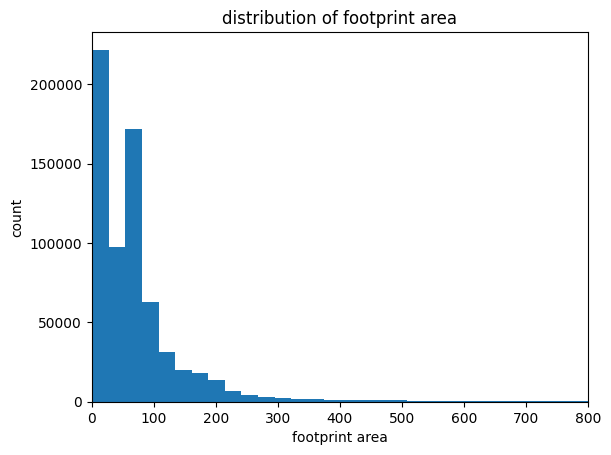

In [7]:
#plot the distribution of the footprint area
# plot size
plt.figure()
plt.hist(df_all["footprint_area"], bins=3000)
plt.xlim(0,800)
plt.xlabel("footprint area")
plt.ylabel("count")
plt.title("distribution of footprint area")
plt.show()


C:\Users\zhaox\AppData\Local\Temp\ipykernel_53740\2659737382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_filtered["area_bin"] = (df_all_filtered["footprint_area"] // bin_width) * bin_width


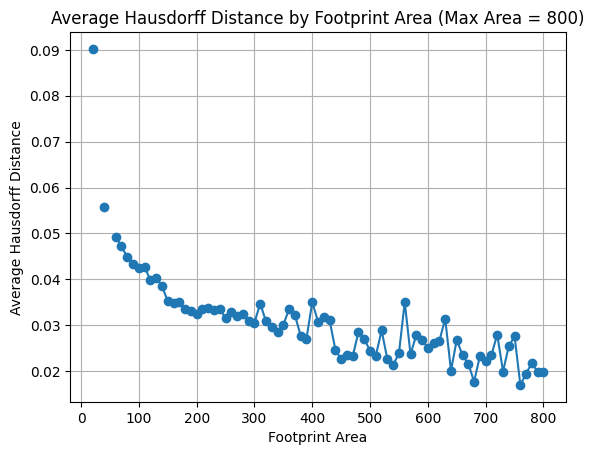

In [8]:
df_all_filtered = df_all[df_all["footprint_area"] <= 800]

# 指定分组的宽度
bin_width = 10
df_all_filtered["area_bin"] = (df_all_filtered["footprint_area"] // bin_width) * bin_width

# 计算每个区间的 Hausdorff 距离平均值
avg_hausdorff = df_all_filtered.groupby("area_bin")["hausdorff_distance"].mean().reset_index()

# 绘制图像
plt.figure()
plt.plot(avg_hausdorff["area_bin"], avg_hausdorff["hausdorff_distance"], marker='o', linestyle='-')
plt.xlabel("Footprint Area")
plt.ylabel("Average Hausdorff Distance")
plt.title("Average Hausdorff Distance by Footprint Area (Max Area = 800)")
plt.grid()
plt.show()

In [6]:
from utils.file_utils import scan_files, write_to_png
from utils.mesh_footprintProcessor import project_mesh_to_xy
from utils.lasProcessor import convert_las_to_roof
import trimesh


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
if df_sparsity.index.duplicated().any():
    print("Duplicate indices found in DataFrame")
    print(df_sparsity[df_sparsity.index.duplicated(keep=False)])

NameError: name 'df_sparsity' is not defined

In [9]:
df_selected = df_all[(df_all["hausdorff_distance"]>0.10)&(df_all["footprint_area"]>100) | (df_all["chamfer_distance"]>0.02)&(df_all["footprint_area"]>30)|(df_all["slope_face_number"]>20)&(df_all["footprint_area"]>30)]
print(len(df_selected))
df_selected = df_all[(df_all["normalized_hausdorff_distance"]>0.10)&(df_all["footprint_area"]>50) | (df_all["sparsity_rate"]>0.25)&(df_all["footprint_area"]>45)&(df_all["normalized_hausdorff_distance"]>0.08)]
#df_selected = df_selected[(df_selected["slope_face_number"]>1)]
print(len(df_selected))

449396
14646


In [10]:
#complex model
df_complex = df_all[(df_all["slope_face_number"]>10)&(df_all["footprint_area"]>40)|(df_all["footprint_area"]>60)]
print(len(df_complex))

312085


In [7]:
files = df_selected.to_dict(orient='index')  # 默认每行是一个子字典
output_path_father = r"D:\thesis\progress\3.13\16bit"
# Initialize a list for rows
processed = 0
for k, v in files.items():
    processed += 1
    if processed % 100 == 0:
        print(f"Processed {processed} files")
    try:
        path1 = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","matched_"+v["data source"]+"_pcl")
        path1_added = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","added_"+v["data source"]+"_las")
        path2 = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","matched_"+"gt_model")
        path2_repaired = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","repaired")
        output_path = os.path.join(output_path_father)
        #laspath = v[path1+"/"+"file_name"+ ".las"]
        laspath = os.path.join(path1, v["filename"]+".las")
        if not os.path.exists(laspath):
            print("not exist laspath",laspath, v["filename"], "turn to added")
            laspath = os.path.join(path1_added, v["filename"]+".las")
        #plypath = v[path2+"/"+"file_name"+ ".ply"]
        plypath = os.path.join(path2, v["filename"]+".ply") #mesh
        if not os.path.exists(plypath):
            print("not exist laspath",laspath, v["filename"], "turn to repaired")
            plypath = os.path.join(path2_repaired, v["filename"]+".ply")


            # Load and process the mesh
        mesh = trimesh.load_mesh(plypath)
        bounds = mesh.bounds  # [[min_x, min_y, min_z], [max_x, max_y, max_z]]
        min_x, min_y = bounds[0][:2]
        max_x, max_y = bounds[1][:2]
        x_range = max_x - min_x
        y_range = max_y - min_y
        max_range = max(x_range, y_range)
        resolution = 128
        range_bbx = [max_range,min_x,max_x, min_y, max_y]
        # print("processing", v["filename"])  

        # Project the mesh to the XY plane,setting range_bbx to is to ensure the height map has the same
        # range as the footprint file
        heightmap, footprint_np, mesh_faces, slope_ratio, slope_face_num, bounds_xy, *_ = project_mesh_to_xy(plypath, resolution=resolution)
        footprint_np = footprint_np[::-1]
        footprint_area = np.sum(footprint_np)*0.3*0.3
        #write_to_png(footprint_np, os.path.join(path2, f"{k}.png"), mode="L")
        # print(footprint_np.dtype)
        # print(footprint_np.max(),footprint_np.min())
        #footprint_np = (footprint_np*255).astype(np.uint8)
        write_to_png(footprint_np*255, os.path.join(output_path, "footprint", v["filename"]+".png"), mode='I;16')
        write_to_png(heightmap, os.path.join(output_path, "heightmap", v["filename"]+".png"), mode='I;16')

        las_roof_np = convert_las_to_roof(laspath,range_bbx=range_bbx, resolution=resolution)
        las_roof_np = las_roof_np[::-1]
        #las_roof_np = (las_roof_np).astype(np.uint8)

        #las_roof_np[las_roof_np>60000]=0 #删除异常值
        # print(las_roof_np.max(),las_roof_np.min())
        write_to_png(las_roof_np, os.path.join(output_path, "corrupt", v["filename"]+".png"), mode='I;16')
    except Exception as e:
        print(e)
        print("error",v["filename"])
        continue

Processed 100 files


KeyboardInterrupt: 

In [ ]:
files = df_selected.to_dict(orient='index')  # 默认每行是一个子字典
output_path_father = r"D:\thesis\progress\3.15\dynamicresolution"
# Initialize a list for rows
processed = 0
for k, v in files.items():
    # path1 = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","matched_"+v["data source"]+"_pcl")
    # path2 = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","matched_"+"gt_model")
    # output_path = os.path.join(output_path_father)
    # #laspath = v[path1+"/"+"file_name"+ ".las"]
    # laspath = os.path.join(path1, v["filename"]+".las")
    # #plypath = v[path2+"/"+"file_name"+ ".ply"]
    # plypath = os.path.join(path2, v["filename"]+".ply")
    path1 = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","matched_"+v["data source"]+"_pcl")
    path1_added = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","added_"+v["data source"]+"_las")
    path2 = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","matched_"+"gt_model")
    path2_repaired = os.path.join(r"D:\BuildingPccdata", v["city"]+r"_processed","output_all","repaired")
    output_path = os.path.join(output_path_father)
    #laspath = v[path1+"/"+"file_name"+ ".las"]
    laspath = os.path.join(path1, v["filename"]+".las")
    if not os.path.exists(laspath):
        print("not exist laspath",laspath, v["filename"], "turn to added")
        laspath = os.path.join(path1_added, v["filename"]+".las")
    #plypath = v[path2+"/"+"file_name"+ ".ply"]
    plypath = os.path.join(path2, v["filename"]+".ply") #mesh
    if not os.path.exists(plypath):
        print("not exist laspath",laspath, v["filename"], "turn to repaired")
        plypath = os.path.join(path2_repaired, v["filename"]+".ply")


        # Load and process the mesh
    mesh = trimesh.load_mesh(plypath)
    bounds = mesh.bounds  # [[min_x, min_y, min_z], [max_x, max_y, max_z]]
    min_x, min_y = bounds[0][:2]
    max_x, max_y = bounds[1][:2]
    x_range = max_x - min_x
    y_range = max_y - min_y
    max_range = max(x_range, y_range)
    resolution = 128
    range_bbx = [max_range,min_x,max_x, min_y, max_y]

    resolution = (max_range//8 + 1)*64
    if resolution > 1024:
        resolution = 2048
    
    pixel_size = 8/64
    # Project the mesh to the XY plane,setting range_bbx to is to ensure the height map has the same
    # range as the footprint file
    heightmap, footprint_np, mesh_faces, slope_ratio, slope_face_num,*_ = project_mesh_to_xy(plypath, resolution=resolution, pixel_size=pixel_size)
    min_z = _[-1]
    footprint_np = footprint_np[::-1]
    footprint_area = np.sum(footprint_np)*0.3*0.3
    #write_to_png(footprint_np, os.path.join(path2, f"{k}.png"), mode="L")
    # print(footprint_np.dtype)
    # print(footprint_np.max(),footprint_np.min())
    #footprint_np = (footprint_np*255).astype(np.uint8)

    '''
    write_to_png(footprint_np*255, os.path.join(output_path,f"{resolution}", "footprint", v["filename"]+'_'+v['data source']+".png"), mode='I;16')
    write_to_png(heightmap, os.path.join(output_path, f"{resolution}","heightmap", v["filename"]+'_'+v['data source']+".png"), mode='I;16')

    las_roof_np = convert_las_to_roof(laspath,range_bbx=range_bbx, resolution=resolution, pixel_size=pixel_size, min_z=min_z)
    las_roof_np = las_roof_np[::-1]
    #las_roof_np = (las_roof_np).astype(np.uint8)

    #las_roof_np[las_roof_np>60000]=0 #删除异常值
    #print(las_roof_np.max(),las_roof_np.min())
    write_to_png(las_roof_np, os.path.join(output_path, f"{resolution}","corrupt", v["filename"]+'_'+v['data source']+"f.png"), mode='I;16')
    '''
    #copy ply file to the output folder, and rename it
    import shutil
    os.makedirs(os.path.join(output_path, f"{resolution}","las"), exist_ok=True)
    shutil.copy(laspath, os.path.join(output_path, f"{resolution}","las", v["filename"]+'_'+v['data source']+".las"))

    processed += 1
    if processed % 100 == 0:
        print(f"Processed {processed} files")


Processed 100 files
Processed 200 files
Processed 300 files
Processed 400 files
Processed 500 files
Processed 600 files
Processed 700 files
Processed 800 files
Processed 900 files
Processed 1000 files
Processed 1100 files
Processed 1200 files
Processed 1300 files
Processed 1400 files
Processed 1500 files
Processed 1600 files
Processed 1700 files
Processed 1800 files
Processed 1900 files
Processed 2000 files
Processed 2100 files
Processed 2200 files
Processed 2300 files
Processed 2400 files
Processed 2500 files
Processed 2600 files
Processed 2700 files
Processed 2800 files
Processed 2900 files
Processed 3000 files
Processed 3100 files
Processed 3200 files
Processed 3300 files
Processed 3400 files
Processed 3500 files
Processed 3600 files
Processed 3700 files
Processed 3800 files
Processed 3900 files
Processed 4000 files
Processed 4100 files
Processed 4200 files
Processed 4300 files
Processed 4400 files
Processed 4500 files
Processed 4600 files
Processed 4700 files
Processed 4800 files
P

In [33]:
import os
import trimesh
import numpy as np
import shutil
from joblib import Parallel, delayed
from tqdm.notebook import tqdm  # For progress bar in Jupyter
import pandas as pd  # Assuming df_complex is a pandas DataFrame

# Assuming df_complex is already defined
files = df_complex.to_dict(orient='index')  # Default: each row is a sub-dictionary
output_path_father = r"D:\thesis\progress\4.12\vqvae_models"

# Define the function to process each file
def process_file(k, v, output_path_father):
    try:
        # Define paths
        path1 = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "matched_" + v["data source"] + "_pcl")
        path1_added = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "added_" + v["data source"] + "_las")
        path2 = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "matched_" + "gt_model")
        path2_repaired = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "repaired")
        output_path = os.path.join(output_path_father)

        # LAS file path
        laspath = os.path.join(path1, v["filename"] + ".las")
        if not os.path.exists(laspath):
            print(f"not exist laspath {laspath} {v['filename']} turn to added")
            laspath = os.path.join(path1_added, v["filename"] + ".las")

        # PLY file path
        plypath = os.path.join(path2, v["filename"] + ".ply")  # Mesh
        if not os.path.exists(plypath):
            print(f"not exist plypath {plypath} {v['filename']} turn to repaired")
            plypath = os.path.join(path2_repaired, v["filename"] + ".ply")

        # Load and process the mesh
        mesh = trimesh.load_mesh(plypath)
        bounds = mesh.bounds  # [[min_x, min_y, min_z], [max_x, max_y, max_z]]
        min_x, min_y = bounds[0][:2]
        max_x, max_y = bounds[1][:2]
        x_range = max_x - min_x
        y_range = max_y - min_y
        max_range = max(x_range, y_range)
        range_bbx = [max_range, min_x, max_x, min_y, max_y]

        resolution = (max_range // 8 + 1) * 64
        if resolution > 1024:
            resolution = 2048

        pixel_size = 8 / 64
        # Project the mesh to the XY plane
        heightmap, footprint_np, mesh_faces, slope_ratio, slope_face_num, *_ = project_mesh_to_xy(
            plypath, resolution=resolution, pixel_size=pixel_size
        )
        min_z = _[-1]
        footprint_np = footprint_np[::-1]
        footprint_area = np.sum(footprint_np) * 0.3 * 0.3

        # Commented out PNG writing for now (uncomment if needed)
        '''
        write_to_png(
            footprint_np * 255,
            os.path.join(output_path, f"{resolution}", "footprint", v["filename"] + '_' + v['data source'] + ".png"),
            mode='I;16'
        )
        write_to_png(
            heightmap,
            os.path.join(output_path, f"{resolution}", "heightmap", v["filename"] + '_' + v['data source'] + ".png"),
            mode='I;16'
        )

        las_roof_np = convert_las_to_roof(
            laspath, range_bbx=range_bbx, resolution=resolution, pixel_size=pixel_size, min_z=min_z
        )
        las_roof_np = las_roof_np[::-1]
        write_to_png(
            las_roof_np,
            os.path.join(output_path, f"{resolution}", "corrupt", v["filename"] + '_' + v['data source'] + "f.png"),
            mode='I;16'
        )
        '''

        # Copy LAS file to the output folder
        # output_las_dir = os.path.join(output_path, f"{resolution}", "las")
        # os.makedirs(output_las_dir, exist_ok=True)  # Thread-safe directory creation
        output_ply_dir = os.path.join(output_path, f"{resolution}", "ply")
        os.makedirs(output_ply_dir, exist_ok=True)  # Thread-safe directory creation
        shutil.copy(
            #laspath,
            plypath,
            #os.path.join(output_ply_dir, v["filename"] + '_' + v['data source'] + ".ply")
            os.path.join(output_ply_dir, v["filename"] + ".ply")
            #os.path.join(output_las_dir, v["filename"] + '_' + v['data source'] + ".las")
            #os.path.join(output_las_dir, v["filename"] + ".las")

        )

        return 1  # Indicate successful processing
    except Exception as e:
        print(f"Error processing {v['filename']}: {e}")
        return 0  # Indicate failure

# Parallel processing
n_jobs = -1  # Use all available CPU cores; adjust if needed (e.g., 4 for 4 cores)
results = Parallel(n_jobs=n_jobs, verbose=1)(
    delayed(process_file)(k, v, output_path_father) for k, v in tqdm(files.items(), total=len(files), desc="Processing files")
)

# Count processed files
processed = sum(results)
print(f"Processed {processed} files")

Processing files:   0%|          | 0/312085 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8386 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9736 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 12736 tasks    

Processed 312085 files


[Parallel(n_jobs=-1)]: Done 312085 out of 312085 | elapsed: 64.9min finished


In [ ]:
import os
import trimesh
import numpy as np
import shutil
from joblib import Parallel, delayed
from tqdm.notebook import tqdm  # For progress bar in Jupyter
import pandas as pd  # Assuming df_complex is a pandas DataFrame

# Assuming df_complex is already defined
files = df_complex.to_dict(orient='index')  # Default: each row is a sub-dictionary
print(len(files))
#随机选择3000个文件
import random
keys = list(files.keys())
random.shuffle(keys)
files = {k: files[k] for k in keys[:3000]}
output_path_father = r"D:\thesis\progress\5.19\benchmark"
print(len(files))

312085
3000


In [12]:
files = df_complex.to_dict(orient='index')  # Default: each row is a sub-dictionary
print(len(files))
output_path_father = r"D:\thesis\progress\5.21fulldataset"

312085


In [13]:
import os
import trimesh
import numpy as np
import shutil
from joblib import Parallel, delayed
from tqdm.notebook import tqdm  # For progress bar in Jupyter
import pandas as pd  # Assuming df_complex is a pandas DataFrame



# Define the function to process each file
def process_file(k, v, output_path_father):
    try:
        # Define paths
        path1 = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "matched_" + v["data source"] + "_pcl")
        path1_added = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "added_" + v["data source"] + "_las")
        path2 = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "matched_" + "gt_model")
        path2_repaired = os.path.join(r"D:\BuildingPccdata", v["city"] + r"_processed", "output_all", "repaired")
        output_path = os.path.join(output_path_father)

        # LAS file path
        laspath = os.path.join(path1, v["filename"] + ".las")
        if not os.path.exists(laspath):
            print(f"not exist laspath {laspath} {v['filename']} turn to added")
            laspath = os.path.join(path1_added, v["filename"] + ".las")

        # PLY file path
        plypath = os.path.join(path2, v["filename"] + ".ply")  # Mesh
        if not os.path.exists(plypath):
            print(f"not exist plypath {plypath} {v['filename']} turn to repaired")
            plypath = os.path.join(path2_repaired, v["filename"] + ".ply")

        # Load and process the mesh
        mesh = trimesh.load_mesh(plypath)
        bounds = mesh.bounds  # [[min_x, min_y, min_z], [max_x, max_y, max_z]]
        min_x, min_y = bounds[0][:2]
        max_x, max_y = bounds[1][:2]
        x_range = max_x - min_x
        y_range = max_y - min_y
        max_range = max(x_range, y_range)
        range_bbx = [max_range, min_x, max_x, min_y, max_y]

        resolution = (max_range // 8 + 1) * 64
        if resolution > 1024:
            resolution = 2048

        pixel_size = 8 / 64
        # Project the mesh to the XY plane
        heightmap, footprint_np, mesh_faces, slope_ratio, slope_face_num, *_ = project_mesh_to_xy(
            plypath, resolution=resolution, pixel_size=pixel_size
        )
        min_z = _[-1]
        footprint_np = footprint_np[::-1]
        footprint_area = np.sum(footprint_np) * 0.3 * 0.3

        # Commented out PNG writing for now (uncomment if needed)
        
        write_to_png(
            footprint_np * 255,
            os.path.join(output_path, f"{resolution}", "footprint", v["filename"] + '_' + v['data source'] + ".png"),
            mode='I;16'
        )
        write_to_png(
            heightmap,
            os.path.join(output_path, f"{resolution}", "heightmap", v["filename"] + '_' + v['data source'] + ".png"),
            mode='I;16'
        )

        las_roof_np = convert_las_to_roof(
            laspath, range_bbx=range_bbx, resolution=resolution, pixel_size=pixel_size, min_z=min_z
        )
        las_roof_np = las_roof_np[::-1]
        write_to_png(
            las_roof_np,
            os.path.join(output_path, f"{resolution}", "corrupt", v["filename"] + '_' + v['data source'] + "f.png"),
            mode='I;16'
        )
        

        # Copy LAS file to the output folder
        # output_las_dir = os.path.join(output_path, f"{resolution}", "las")
        # os.makedirs(output_las_dir, exist_ok=True)  # Thread-safe directory creation
        output_ply_dir = os.path.join(output_path, f"{resolution}", "ply")
        os.makedirs(output_ply_dir, exist_ok=True)  # Thread-safe directory creation
        shutil.copy(
            #laspath,
            plypath,
            #os.path.join(output_ply_dir, v["filename"] + '_' + v['data source'] + ".ply")
            os.path.join(output_ply_dir, v["filename"] + ".ply")
            #os.path.join(output_las_dir, v["filename"] + '_' + v['data source'] + ".las")
            #os.path.join(output_las_dir, v["filename"] + ".las")

        )

        return 1  # Indicate successful processing
    except Exception as e:
        print(f"Error processing {v['filename']}: {e}")
        return 0  # Indicate failure

# Parallel processing
n_jobs = -1  # Use all available CPU cores; adjust if needed (e.g., 4 for 4 cores)
results = Parallel(n_jobs=n_jobs, verbose=1)(
    delayed(process_file)(k, v, output_path_father) for k, v in tqdm(files.items(), total=len(files), desc="Processing files")
)

# Count processed files
processed = sum(results)
print(f"Processed {processed} files")

Processing files:   0%|          | 0/312085 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8386 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9736 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 12736 tasks    

Processed 312085 files


[Parallel(n_jobs=-1)]: Done 312085 out of 312085 | elapsed: 65.2min finished
